In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the dataset
file_path = 'spam.csv'  # The path to the uploaded file
data = pd.read_csv(file_path, encoding='latin-1')

# Inspect the first few rows
data.head()



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Drop unnecessary columns if any exist (assuming columns like 'Unnamed: 2', 'Unnamed: 3', etc.)
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], errors='ignore')

# Rename columns for clarity
data.columns = ['label', 'email']

# Map the 'ham' and 'spam' labels to 0 and 1 respectively
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Check for missing values
data.isnull().sum()


,0
label,0
email,0


In [ ]:
# Split the data into features and labels
X = data['email']
y = data['label']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Use TfidfVectorizer to convert the text data to numerical vectors
vectorizer = TfidfVectorizer(stop_words='english')

# Transform the text data
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)


In [ ]:
# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train_transformed, y_train)


MultinomialNB()

Accuracy: 96.68%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



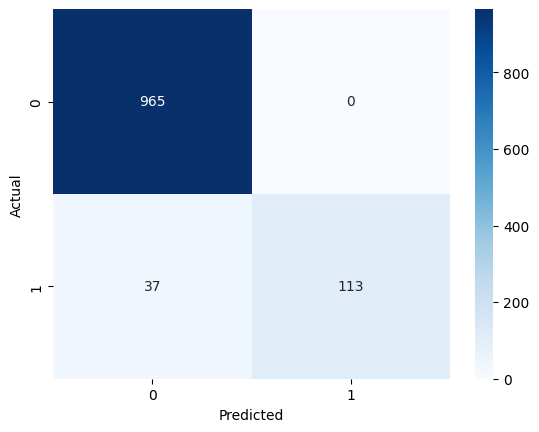

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test_transformed)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a grid of parameters to test
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5]
}

# Initialize GridSearchCV
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Train the grid search model
grid.fit(X_train_transformed, y_train)

# Best parameters
print(f"Best parameters: {grid.best_params_}")

# Test the optimized model
y_pred_optimized = grid.best_estimator_.predict(X_test_transformed)

# Optimized accuracy
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {optimized_accuracy * 100:.2f}%")


Best parameters: {'alpha': 0.5}
Optimized Accuracy: 97.67%
